# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></div><div class="lev2 toc-item"><a href="#Run-these-cells-(hopefully-exactly-once-in-total,-ever)-to-install-notebook-extensions" data-toc-modified-id="Run-these-cells-(hopefully-exactly-once-in-total,-ever)-to-install-notebook-extensions-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Run these cells (hopefully exactly once in total, ever) to install notebook extensions</a></div><div class="lev2 toc-item"><a href="#Get-the-Open-American-National-Corpus" data-toc-modified-id="Get-the-Open-American-National-Corpus-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Get the Open American National Corpus</a></div><div class="lev2 toc-item"><a href="#Run-once-every-time-you-start-the-notebook" data-toc-modified-id="Run-once-every-time-you-start-the-notebook-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Run once every time you start the notebook</a></div><div class="lev1 toc-item"><a href="#Language-modeling-lab-overview" data-toc-modified-id="Language-modeling-lab-overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Language modeling lab overview</a></div><div class="lev1 toc-item"><a href="#From-text-to-estimating-the-probability-of-a-word-sequence" data-toc-modified-id="From-text-to-estimating-the-probability-of-a-word-sequence-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>From text to estimating the probability of a word sequence</a></div><div class="lev2 toc-item"><a href="#Our-data..." data-toc-modified-id="Our-data...-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Our data...</a></div><div class="lev2 toc-item"><a href="#Getting-counts-and-unsmoothed-probability-estimates" data-toc-modified-id="Getting-counts-and-unsmoothed-probability-estimates-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Getting counts and unsmoothed probability estimates</a></div><div class="lev3 toc-item"><a href="#Unigrams" data-toc-modified-id="Unigrams-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Unigrams</a></div><div class="lev4 toc-item"><a href="#Power-law-distributions-and-language" data-toc-modified-id="Power-law-distributions-and-language-3211"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Power law distributions and language</a></div><div class="lev4 toc-item"><a href="#Unigram-language-model" data-toc-modified-id="Unigram-language-model-3212"><span class="toc-item-num">3.2.1.2&nbsp;&nbsp;</span>Unigram language model</a></div><div class="lev3 toc-item"><a href="#Bigrams" data-toc-modified-id="Bigrams-322"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Bigrams</a></div><div class="lev4 toc-item"><a href="#Bigram-language-model" data-toc-modified-id="Bigram-language-model-3221"><span class="toc-item-num">3.2.2.1&nbsp;&nbsp;</span>Bigram language model</a></div><div class="lev1 toc-item"><a href="#Sparsity-and-corpus-properties" data-toc-modified-id="Sparsity-and-corpus-properties-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sparsity and corpus properties</a></div><div class="lev2 toc-item"><a href="#Modeling-segue-1" data-toc-modified-id="Modeling-segue-1-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Modeling segue 1</a></div><div class="lev2 toc-item"><a href="#Modeling-segue-2" data-toc-modified-id="Modeling-segue-2-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modeling segue 2</a></div><div class="lev2 toc-item"><a href="#Exercises-for-the-reader----Implementing-another-evaluation-measure" data-toc-modified-id="Exercises-for-the-reader----Implementing-another-evaluation-measure-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Exercises for the reader -- Implementing another evaluation measure</a></div><div class="lev1 toc-item"><a href="#Python-/-tool-resources" data-toc-modified-id="Python-/-tool-resources-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Python / tool resources</a></div><div class="lev1 toc-item"><a href="#Further-reading-on-language-modeling" data-toc-modified-id="Further-reading-on-language-modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Further reading on language modeling</a></div>

# Initialization

## Get the Open American National Corpus

For $\S$ 4, download http://www.anc.org/OANC/OANC_GrAF.zip (~650 MB), put it in the same folder as this notebook, and *then* unzip it. **Note that the unzipped corpus is $\approx$ *6-7 GB!*** 

Alternatively, there are code cells in $\S$ 4 that will do both of these things for you; if you use them, you won't be able to execute other code while the download and unzipping are in progress.

## Run once every time you start the notebook

In [1]:
from IPython.display import Markdown

In [3]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Makes better use of screen real estate
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#pd.set_option('max_colwidth',80)

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>
<!-- aligns tables to the left ->

In [ ]:
#installs a plotting library - https://github.com/yhat/ggpy
!pip install -U ggplot

In [5]:
%matplotlib inline
import nltk
import numpy as np
import pandas as pd
from ggplot import *

import random, requests, zipfile, glob, itertools

/Users/ericmeinhardt/anaconda/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/ericmeinhardt/anaconda/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/ericmeinhardt/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Language modeling lab overview

**Previously...**
1. **Reading** + **guest lecture** + on **language models**.
2. **Mathematical calculation** of **n-gram probabilities** from counts or probabilities.

**Goals for today**
1. **Hands-on experience building and evaluating an unsmoothed n-gram model.**
2. Introduce **visualization tools** - might be useful for your project or other future data analysis...
3. Use visualization and performance measures from book/lecture to **evaluate model behavior as we tweak *different input data* and *model choices***.

# From text to estimating the probability of a word sequence

## Our data...

In [6]:
from nltk.corpus import brown, gutenberg

In [7]:
brown.words()[:10]
gutenberg.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

Looks like we may want to *normalize* our data -- for our purposes here, that can just mean converting all words to lowercase.

In [8]:
def myNormalize(a_string):
    return a_string.lower()

brown_words = list(map(myNormalize, brown.words() ) )
gutenberg_words = list(map(myNormalize, gutenberg.words() ) )

Out of curiosity, how much data do we have?

In [9]:
b_length = len(brown_words)
g_length = len(gutenberg_words)
normalized_brown_v = set(brown_words)
normalized_gutenberg_v = set(gutenberg_words)
b = len(normalized_brown_v)
g = len(normalized_gutenberg_v)

In [12]:
Markdown("""
| Corpus    | Length | Vocab   |
|-----------|--------|---------|
| Brown     | {:,}   | {:,}    |
| Gutenberg | {:,}   | {:,}    |
""".format(b_length, g_length, b, g))


| Corpus    | Length | Vocab   |
|-----------|--------|---------|
| Brown     | 1,161,192   | 2,621,613    |
| Gutenberg | 49,815   | 42,339    |


## Getting counts and unsmoothed probability estimates

See NLTK 
 - Ch 1 $\S$ 3 (http://www.nltk.org/book/ch01.html#sec-computing-with-language-simple-statistics)
 - Ch 2 $\S$ 2 (http://www.nltk.org/book/ch02.html#sec-conditional-frequency-distributions) 

for reference.

### Unigrams

In [13]:
from nltk.probability import FreqDist

In [14]:
brown_unigram_dist = FreqDist(brown_words)
gutenberg_unigram_dist = FreqDist(gutenberg_words)

In [15]:
gutenberg_unigram_dist['the']
gutenberg_unigram_dist.freq('the')
gutenberg_unigram_dist['potato']

133583

0.05095450777822661

9

What do the unigram distributions look like? How do they compare?

In [16]:
print(brown_unigram_dist.most_common(25))
print(gutenberg_unigram_dist.most_common(25))

[('the', 69971), (',', 58334), ('.', 49346), ('of', 36412), ('and', 28853), ('to', 26158), ('a', 23195), ('in', 21337), ('that', 10594), ('is', 10109), ('was', 9815), ('he', 9548), ('for', 9489), ('``', 8837), ("''", 8789), ('it', 8760), ('with', 7289), ('as', 7253), ('his', 6996), ('on', 6741), ('be', 6377), (';', 5566), ('at', 5372), ('by', 5306), ('i', 5164)]
[(',', 186091), ('the', 133583), ('and', 95442), ('.', 73746), ('of', 71267), ('to', 48057), (':', 47406), ('a', 33960), ('in', 33580), ('i', 30265), ('that', 28798), (';', 27329), ('he', 25857), ('it', 22303), ('his', 21402), ("'", 19873), ('for', 19527), ('was', 18715), ('with', 17599), ('not', 17373), ('is', 16435), ('you', 16398), ('be', 16115), ('"', 15422), ('as', 14528)]


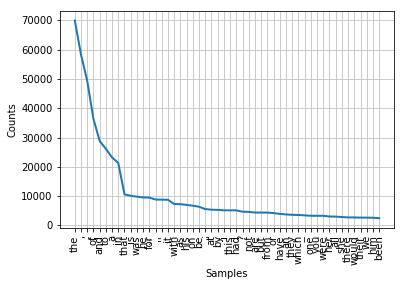

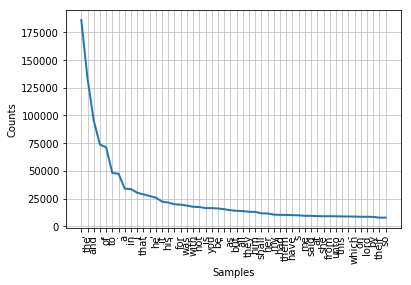

In [17]:
brown_unigram_dist.plot(50)
gutenberg_unigram_dist.plot(50)

#### Power law distributions and language

The distribution shape above plays an important part in why modeling language is difficult. Let's look a little more closely...

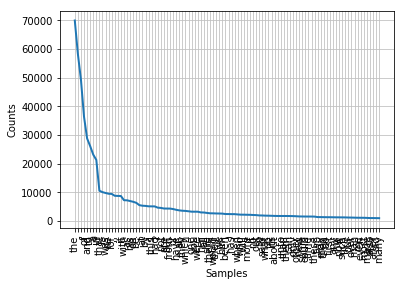

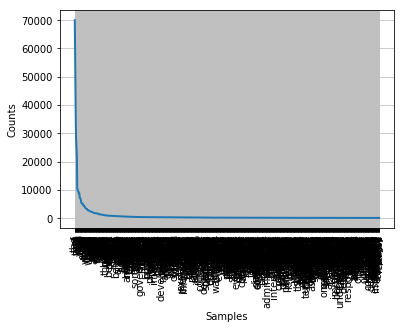

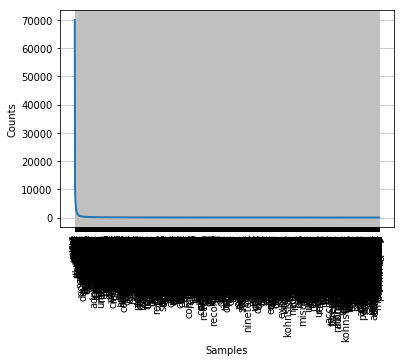

In [18]:
#takes ~1.25m on my i7 MacBook Air
brown_unigram_dist.plot(100)
brown_unigram_dist.plot(1000)
brown_unigram_dist.plot(10000)

NLTK's plotting tool is a little underwhelming: let's turn to **scipy's** plotting library (**matplotlib**, inspired by Matlab's plotting capaibilities) and two tools that make it a little easier to use -- **dataframes** from the **pandas** package (dataframes are basically *tables*; these are taken from the R statistics environment) -- and a high-level interface (called **ggplot**) for working with matplotlib inspired by a plotting package from the R language:

In [19]:
numWords = int(1e4)
#get top 10k unigrams in brown by frequency
top10k_brown = brown_unigram_dist.most_common(numWords)
top10k_brown[0:10]
#collect ranks and frequencies 
countByRank = {rank+1:pair[1] for rank,pair in enumerate(top10k_brown)}
countByRank

[('the', 69971),
 (',', 58334),
 ('.', 49346),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109)]

{1: 69971,
 2: 58334,
 3: 49346,
 4: 36412,
 5: 28853,
 6: 26158,
 7: 23195,
 8: 21337,
 9: 10594,
 10: 10109,
 11: 9815,
 12: 9548,
 13: 9489,
 14: 8837,
 15: 8789,
 16: 8760,
 17: 7289,
 18: 7253,
 19: 6996,
 20: 6741,
 21: 6377,
 22: 5566,
 23: 5372,
 24: 5306,
 25: 5164,
 26: 5145,
 27: 5133,
 28: 4693,
 29: 4610,
 30: 4394,
 31: 4381,
 32: 4370,
 33: 4206,
 34: 3942,
 35: 3740,
 36: 3620,
 37: 3561,
 38: 3432,
 39: 3292,
 40: 3286,
 41: 3284,
 42: 3036,
 43: 3001,
 44: 2860,
 45: 2728,
 46: 2714,
 47: 2669,
 48: 2652,
 49: 2619,
 50: 2472,
 51: 2466,
 52: 2437,
 53: 2435,
 54: 2331,
 55: 2252,
 56: 2245,
 57: 2215,
 58: 2198,
 59: 2139,
 60: 2097,
 61: 1985,
 62: 1961,
 63: 1908,
 64: 1890,
 65: 1858,
 66: 1815,
 67: 1795,
 68: 1791,
 69: 1790,
 70: 1788,
 71: 1772,
 72: 1748,
 73: 1702,
 74: 1635,
 75: 1618,
 76: 1601,
 77: 1598,
 78: 1596,
 79: 1573,
 80: 1412,
 81: 1402,
 82: 1380,
 83: 1363,
 84: 1361,
 85: 1344,
 86: 1318,
 87: 1314,
 88: 1303,
 89: 1292,
 90: 1252,
 91: 1236

In [20]:
countByRank_df = pd.DataFrame({'Rank':list(countByRank.keys()), 'Count':list(countByRank.values())})
countByRank_df.sort_values(by = 'Rank').head()

,Count,Rank
0,69971,1
1,58334,2
2,49346,3
3,36412,4
4,28853,5


(Aside: As you can see, dataframes are essentially tables -- Jupyter even renders them as HTML tables. To the extent they are a representation of **relations**, they are a useful data structure that you can apply **relational algebra**-like (https://en.wikipedia.org/wiki/Relational_algebra) operations to; note, however, that to the extent they are an idiosyncratic object mainly developed for the R programming language, they can be finicky to work with. The Python port of the dplyr package *dfply* (https://github.com/kieferk/dfply) goes some ways towards remedying this situation.)

Now that our count+rank data is in a *dataframe,* we'll use *ggplot* to graphically examine trends in our data. 

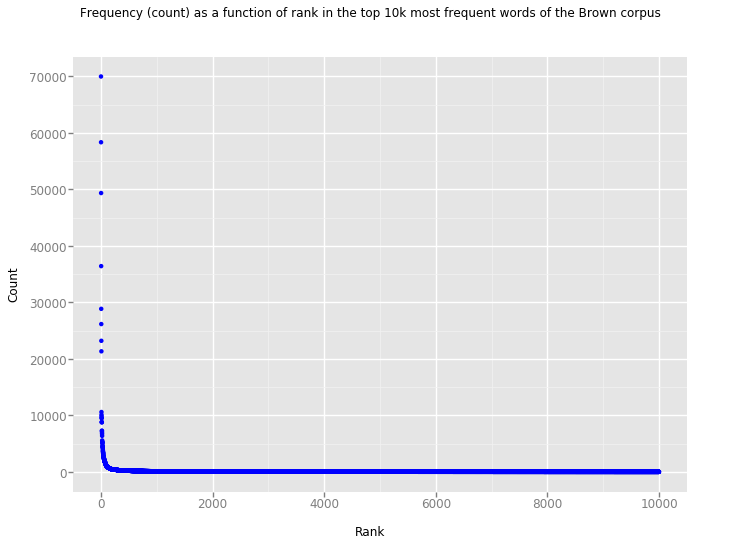

<ggplot: (-9223372036547994245)>

In [21]:
ggplot(countByRank_df, aes(x = 'Rank', y = 'Count')) + \
    geom_point(color='blue') + \
    ggtitle('Frequency (count) as a function of rank in the top 10k most frequent words of the Brown corpus')

Hmm....hard to see much here. Let's plot freqByRank_df in semi-log and log-log plots...

(Aside: Why? How do we interpret these plots? Check out
 - https://en.wikipedia.org/wiki/Semi-log_plot
 - https://en.wikipedia.org/wiki/Log–log_plot )

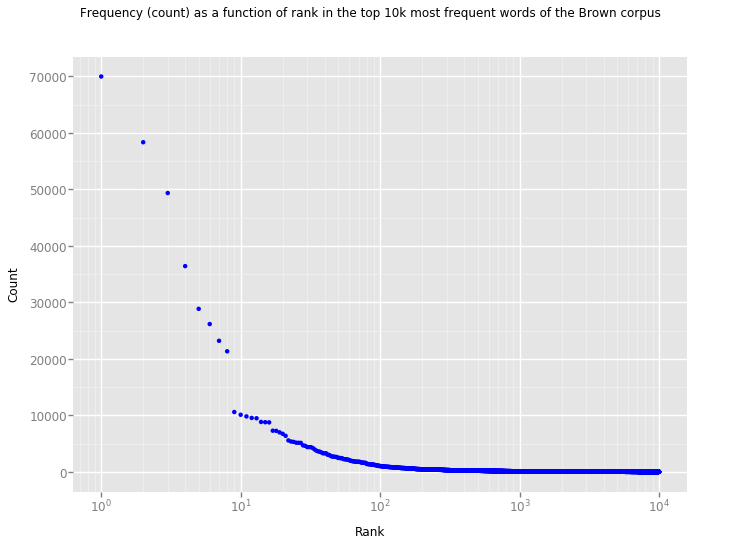

<ggplot: (-9223372036540896694)>

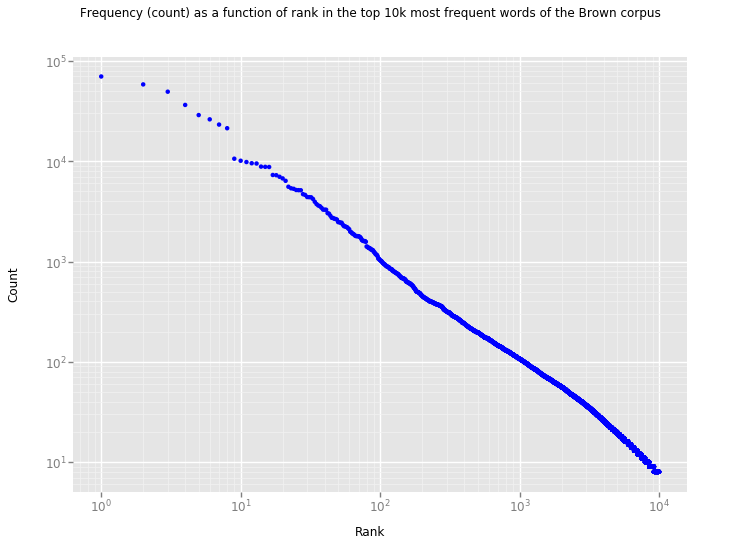

<ggplot: (327021993)>

In [22]:
 ggplot(countByRank_df, aes(x = 'Rank', y = 'Count')) + \
    geom_point(color='blue') + \
    ggtitle('Frequency (count) as a function of rank in the top 10k most frequent words of the Brown corpus') + \
    scale_x_log()

 ggplot(countByRank_df, aes(x = 'Rank', y = 'Count')) + \
    geom_point(color='blue') + \
    ggtitle('Frequency (count) as a function of rank in the top 10k most frequent words of the Brown corpus') + \
    scale_x_log() + scale_y_log()

What's going on here?

 - Check out https://en.wikipedia.org/wiki/Zipf%27s_law.

The **frequency** of a word in a corpus is $\approx$ inversely proportional to the word's **rank**:

$freq(word)$ $f$ as a function of $rank(word)$ $r$ among $N$ words:
$$f(r, N, s) = \frac{1/r^s}{\sum\limits^{N}_{n=1} 1/n^s }$$ for some $s$

Let's see **what this function predicts** for $N = 10,000$ and $s = 1.0$ and **how it compares to our corpus data**...

In [23]:
ranks = range(1,numWords)
#naive implementation - takes too long to execute
#denominator = lambda s, N: sum([1/(n**s) for n in ranks ])
#predicted_freq = lambda r, N, s: (1/(r**s)) / denominator(s,N)
#predicted_freq(1,numWords,0.9)

def make_freq_predictor(s, N):
    my_denominator = sum([1/(n**s) for n in range(1,N)])
    def my_predictor(r):
        return (1/(r**s)) / my_denominator
    return my_predictor

predicted_freq = make_freq_predictor(1.0, numWords)
predicted_freq(1)

0.10217107364402231

In [24]:
predicted_freqByRank = {rank:predicted_freq(rank) for rank in ranks}
predicted_freqByRank

{1: 0.10217107364402231,
 2: 0.051085536822011154,
 3: 0.034057024548007436,
 4: 0.025542768411005577,
 5: 0.020434214728804464,
 6: 0.017028512274003718,
 7: 0.014595867663431758,
 8: 0.012771384205502789,
 9: 0.011352341516002479,
 10: 0.010217107364402232,
 11: 0.009288279422183847,
 12: 0.008514256137001859,
 13: 0.007859313357232486,
 14: 0.007297933831715879,
 15: 0.006811404909601487,
 16: 0.006385692102751394,
 17: 0.006010063155530724,
 18: 0.005676170758001239,
 19: 0.005377424928632753,
 20: 0.005108553682201116,
 21: 0.004865289221143919,
 22: 0.0046441397110919234,
 23: 0.004442220593218361,
 24: 0.0042571280685009295,
 25: 0.004086842945760893,
 26: 0.003929656678616243,
 27: 0.0037841138386674926,
 28: 0.0036489669158579394,
 29: 0.0035231404704835277,
 30: 0.0034057024548007435,
 31: 0.0032958410852910423,
 32: 0.003192846051375697,
 33: 0.0030960931407279487,
 34: 0.003005031577765362,
 35: 0.002919173532686352,
 36: 0.0028380853790006197,
 37: 0.00276138036875736,
 38

In [25]:
predicted_freqByRank_df = pd.DataFrame({'Rank':list(predicted_freqByRank.keys()), 'Frequency':list(predicted_freqByRank.values())})
predicted_freqByRank_df.sort_values(by = 'Rank').head()

,Frequency,Rank
0,0.102171,1
1,0.051086,2
2,0.034057,3
3,0.025543,4
4,0.020434,5


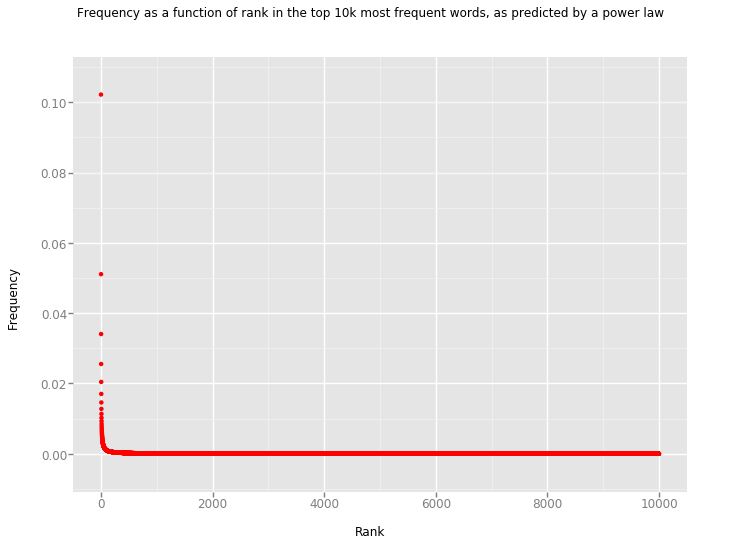

<ggplot: (326565910)>

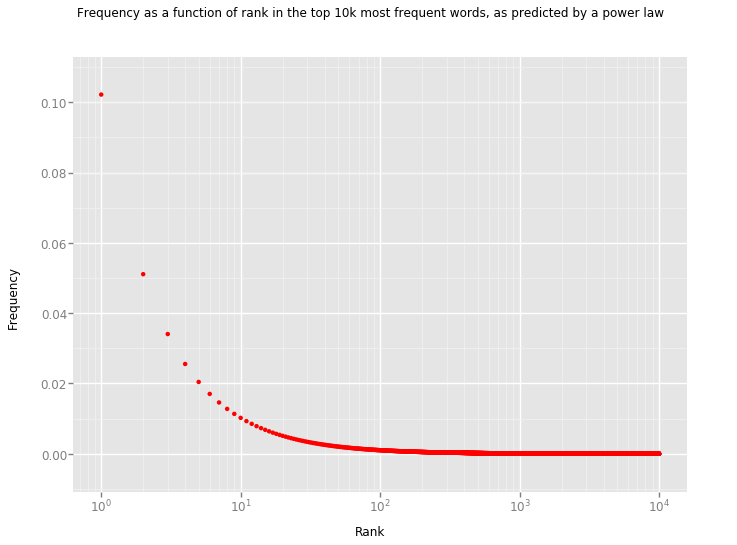

<ggplot: (-9223372036527751785)>

In [26]:
 ggplot(predicted_freqByRank_df, aes(x = 'Rank', y = 'Frequency')) + \
    geom_point(color='red') + \
    ggtitle("Frequency as a function of rank in the top 10k most frequent words, as predicted by a power law")

 ggplot(predicted_freqByRank_df, aes(x = 'Rank', y = 'Frequency')) + \
    geom_point(color='red') + \
    ggtitle("Frequency as a function of rank in the top 10k most frequent words, as predicted by a power law") + \
    scale_x_log()

Let's try to compare these two distributions (predicted vs. actual) by overlaying the same datapoints on a single plot.

We'll start by making our data comparable -- i.e. transforming our Brown counts to relative frequencies:

In [27]:
totalCount = sum([pair[1] for pair in top10k_brown])
totalCount
freqByRank = {rank+1:pair[1]/totalCount for rank,pair in enumerate(top10k_brown)}
freqByRank

1078467

{1: 0.06488005659885746,
 2: 0.05408974034439626,
 3: 0.04575568839843964,
 4: 0.03376273914732671,
 5: 0.026753716154504496,
 6: 0.024254798709649902,
 7: 0.021507380383451697,
 8: 0.0197845645717486,
 9: 0.009823202749829155,
 10: 0.009373490333964785,
 11: 0.009100881158162466,
 12: 0.00885330751891342,
 13: 0.008798600235334044,
 14: 0.0081940383896772,
 15: 0.008149530769138045,
 16: 0.00812264074839564,
 17: 0.006758667627289477,
 18: 0.006725286911885111,
 19: 0.006486985693581723,
 20: 0.006250538959467466,
 21: 0.005913022837045547,
 22: 0.005161029498352754,
 23: 0.004981144532007006,
 24: 0.004919946553765669,
 25: 0.004788278176337338,
 26: 0.00477066057654059,
 27: 0.0047595336714058014,
 28: 0.0043515471497968874,
 29: 0.004274586055947933,
 30: 0.0040743017635217395,
 31: 0.004062247616292386,
 32: 0.0040520479532521626,
 33: 0.0038999802497433856,
 34: 0.0036551883367780375,
 35: 0.0034678854336757637,
 36: 0.0033566163823278783,
 37: 0.003301909098748501,
 38: 0.003182

In [28]:
freqByRank_df = pd.DataFrame({'Rank':list(freqByRank.keys()), 'Frequency':list(freqByRank.values()), 'Real data':[True for each in freqByRank.keys()]})
freqByRank_df.sort_values(by = 'Rank').head()
predicted_freqByRank_df = pd.DataFrame({'Rank':list(predicted_freqByRank.keys()), 'Frequency':list(predicted_freqByRank.values()), 'Real data':[False for each in predicted_freqByRank.keys()] })
predicted_freqByRank_df.sort_values(by = 'Rank').head()

,Frequency,Rank,Real data
0,0.064880,1,True
1,0.054090,2,True
2,0.045756,3,True
3,0.033763,4,True
4,0.026754,5,True


,Frequency,Rank,Real data
0,0.102171,1,False
1,0.051086,2,False
2,0.034057,3,False
3,0.025543,4,False
4,0.020434,5,False


Now we need data in a common dataframe:

In [29]:
combined_df = freqByRank_df.append( predicted_freqByRank_df )
combined_df.head()
combined_df.tail()

,Frequency,Rank,Real data
0,0.064880,1,True
1,0.054090,2,True
2,0.045756,3,True
3,0.033763,4,True
4,0.026754,5,True


,Frequency,Rank,Real data
9994,0.00001,9995,False
9995,0.00001,9996,False
9996,0.00001,9997,False
9997,0.00001,9998,False
9998,0.00001,9999,False


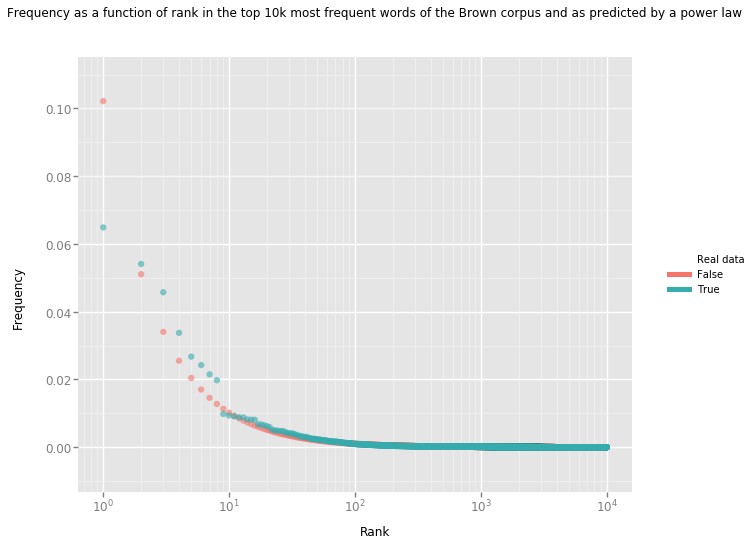

<ggplot: (326210368)>

In [30]:
ggplot(combined_df, aes(x = 'Rank', y = 'Frequency', color='Real data')) + \
    geom_point(size = 40, alpha = 0.6) + \
    ggtitle('Frequency as a function of rank in the top 10k most frequent words of the Brown corpus and as predicted by a power law') + \
    scale_x_log()

That something as messy as natural language should follow such a pattern should be striking.

*What does it mean, though?* **Who cares?** For a mix of engineering and scientific consequences, check out:
 - https://en.wikipedia.org/wiki/Power_law#Properties
 - Volume 6 of Linguistic Issues in Language Technology (LiLT; http://journals.linguisticsociety.org/elanguage/lilt/issue/view/330.html)
  - Kay, M. (2011). *Zipf’s Law and L’Arbitraire du Signe.* http://journals.linguisticsociety.org/elanguage/lilt/article/download/2584/2584-5332-1-PB.pdf
  - Steedman, M. (2011). *Romantics and Revolutionaries: What Theoretical and Computational Linguists Need to Know about Each Other, But Were Afraid To Ask.* http://journals.linguisticsociety.org/elanguage/lilt/article/download/2587/2587-5344-1-PB.pdf
 - Piantadosi, S. (2015). *Zipf’s word frequency law in natural language: A critical review and future directions.* https://colala.bcs.rochester.edu/papers/piantadosi2014zipfs.pdf
 
 Also related:
  - Piantadosi, S., Tily, H., & Gibson E. (2011). *Word lengths are optimized for efficient communication.* https://colala.bcs.rochester.edu/papers/PNAS-2011-Piantadosi-1012551108.pdf
  - Piantadosi, S., Tily, H., & Gibson E. (2011). *The communicative function of ambiguity in language.* https://colala.bcs.rochester.edu/papers/piantadosi2012communicative.pdf

#### Unigram language model

$$p(w_1,w_2...w_n) = \prod\limits_{i=1}^{i=n} w_i$$

In [31]:
def joint_unigram_prob(a_sentence, a_FreqDist, lookInside = False):
    '''Calculates the unigram MLE of word sequence a_sentence using an NLTK FreqDist (unsmoothed unigram MLE).
    Example usage:
    joint_unigram_prob(['i', 'dislike', 'eggs', 'and', 'ham'], FreqDist([w.lower() for w in brown.words()]))
    '''
    if lookInside:
        print([a_FreqDist.freq(word) for word in a_sentence])
    return np.prod([a_FreqDist.freq(word) for word in a_sentence])

s = brown.sents()[7364]
s_norm = list(map( myNormalize, s) )
print(s_norm)

['to', 'these', 'people', ',', 'solidarity', 'and', 'unity', 'with', 'china', 'should', 'be', 'the', 'real', 'basis', 'of', "russia's", 'future', 'policy', '.']


In [32]:
joint_unigram_prob(s_norm, brown_unigram_dist)
joint_unigram_prob(s_norm, gutenberg_unigram_dist)

3.7954198498745699e-56

0.0

Hmmm...Why does the Gutenberg-based model assign 0 probability to this sentence?

In [33]:
[gutenberg_unigram_dist.freq(word) for word in s_norm]
s_norm[15]
gutenberg_unigram_dist.freq(s_norm[15])

[0.018331080903245443,
 0.0010871169772197497,
 0.0010688076386560488,
 0.07098339838870192,
 3.8144455341043855e-07,
 0.03640583106659907,
 2.288667320462631e-06,
 0.006713042695470308,
 1.4876337583007102e-05,
 0.0009726836111966183,
 0.006146978978209217,
 0.05095450777822661,
 0.00010031991754694534,
 3.8144455341043854e-06,
 0.027184408987901722,
 0.0,
 6.026823943884929e-05,
 9.154669281850524e-06,
 0.0281300100358062]

"russia's"

0.0

In [34]:
s_norm[15] = "russia"
print(s_norm)

brown_prob = joint_unigram_prob(s_norm, brown_unigram_dist)
brown_prob

['to', 'these', 'people', ',', 'solidarity', 'and', 'unity', 'with', 'china', 'should', 'be', 'the', 'real', 'basis', 'of', 'russia', 'future', 'policy', '.']


1.951930208506922e-55

How do the unigram and gutenberg estimates compare on this sentence? Why might that be?

In [35]:
gutenberg_prob = joint_unigram_prob(s_norm, gutenberg_unigram_dist)
brown_prob
gutenberg_prob
'{:,}'.format(brown_prob / gutenberg_prob)

1.951930208506922e-55

2.7010293360229245e-64

'722,661,609.9553372'

### Bigrams

In [36]:
from nltk import bigrams
brown_bigrams = list( bigrams(brown_words) )
brown_bigrams[543:543+10]
joined_bigrams = [' '.join([first, second]) for first,second in brown_bigrams]
joined_bigrams[543:543+10]

[('previous', 'grand'),
 ('grand', 'juries'),
 ('juries', ','),
 (',', 'the'),
 ('the', 'atlanta'),
 ('atlanta', 'bar'),
 ('bar', 'association'),
 ('association', 'and'),
 ('and', 'an'),
 ('an', 'interim')]

['previous grand',
 'grand juries',
 'juries ,',
 ', the',
 'the atlanta',
 'atlanta bar',
 'bar association',
 'association and',
 'and an',
 'an interim']

How does the shape of the prior distribution over bigrams ('ordered word pairs') compare to the prior over unigrams? How do the two data sources compare?

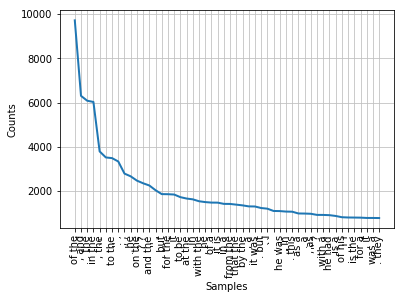

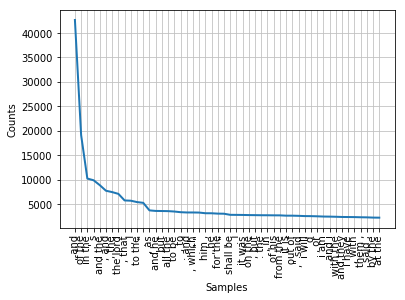

In [37]:
brown_bigram_joint_dist = FreqDist(joined_bigrams)
brown_bigram_joint_dist.plot(50)

gutenberg_bigrams = list( bigrams(gutenberg_words) )
joined_g_bigrams = [' '.join([first, second]) for first,second in gutenberg_bigrams]
gutenberg_bigram_joint_dist = FreqDist(joined_g_bigrams)
gutenberg_bigram_joint_dist.plot(50)

#### Bigram language model

In [38]:
from nltk import ConditionalFreqDist

brown_bigram_conditional_dist = ConditionalFreqDist(brown_bigrams)
gutenberg_bigram_conditional_dist = ConditionalFreqDist(gutenberg_bigrams)

brown_p_word_given_eat = brown_bigram_conditional_dist['eat']
gutenberg_p_word_given_eat = gutenberg_bigram_conditional_dist['eat']
type(brown_p_word_given_eat)

nltk.probability.FreqDist

Notice that here we get a familiar object -- a FreqDist.

How do the brown and gutenberg-based models differ? Why might that be? 

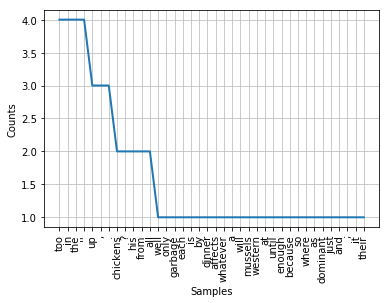

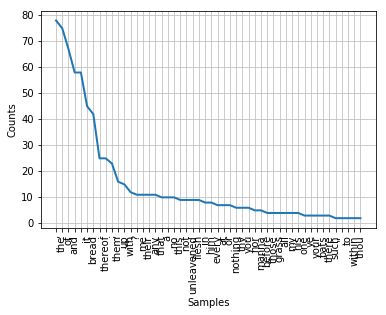

In [39]:
brown_p_word_given_eat.plot(50)
gutenberg_p_word_given_eat.plot(50)

In [35]:
brown_bigram_conditional_dist['eat']['the']
gutenberg_bigram_conditional_dist['eat']['the']
p_the_given_eat_brown = brown_bigram_conditional_dist['eat'].freq('the')
p_the_given_eat_gutenberg = gutenberg_bigram_conditional_dist['eat'].freq('the')
p_the_given_eat_brown
p_the_given_eat_gutenberg
p_the_given_eat_brown / p_the_given_eat_gutenberg 

4

75

0.06557377049180328

0.08833922261484099

0.7422950819672132

$$p(w_1,w_2...w_n) = \prod\limits_{i=1}^{i=n} p(w_i|w_{i-1})$$
*Recall that we can treat every sentence as having special start and stop symbols (common choices include \$, ^, $\ltimes$, $\rtimes$, START, STOP) at $w_0$ and $w_{n+1}$.*

In [40]:
def joint_bigram_prob(a_sentence, a_ConditionalFreqDist, lookInside = False):
    '''Calculates the joint probability of word sequence a_sentence using an NLTK 
    ConditionalFreqDist (unsmoothed MLE of the conditional prob of a word given one 
    previous word).

    Example usage:
    joint_bigram_prob(['i', 'dislike', 'eggs', 'and', 'ham'], ConditionalFreqDist(bigrams(brown_words)))
    '''
    cfd = a_ConditionalFreqDist
    if lookInside:
        print([cfd['.'].freq(a_sentence[0])] + [cfd[word].freq(a_sentence[i+1]) for i,word in enumerate(a_sentence[:-1])])

        #Using '.' as a (crude) end-of-sentence/start-of-sentence symbol...
    return np.prod( [cfd['.'].freq(a_sentence[0])] + [cfd[word].freq(a_sentence[i+1]) for i,word in enumerate(a_sentence[:-1])])

In [41]:
s1 = list(map(myNormalize, "The workers are on strike".split() ))
s2 = list(map(myNormalize, "The old man was in his house".split() ))
joint_bigram_prob(s1, brown_bigram_conditional_dist)
joint_bigram_prob(s1, gutenberg_bigram_conditional_dist)
joint_bigram_prob(s2, brown_bigram_conditional_dist)
joint_bigram_prob(s2, gutenberg_bigram_conditional_dist)

6.3885589948779599e-13

0.0

9.9303376412477014e-13

2.8553106583647879e-12

How do the Brown and Gutenberg-based models differ? Why might that be?

In [42]:
s1
joint_bigram_prob(s1, gutenberg_bigram_conditional_dist, True)

['the', 'workers', 'are', 'on', 'strike']

[0.036721133636178724, 0.0001422336674576855, 0.0, 0.003355704697986577, 0.0]


0.0

In [43]:
s2
joint_bigram_prob(s2, brown_bigram_conditional_dist, True)
joint_bigram_prob(s2, gutenberg_bigram_conditional_dist, True)

['the', 'old', 'man', 'was', 'in', 'his', 'house']

[0.12323437025027865, 0.003344242614797559, 0.10136157337367625, 0.028169014084507043, 0.018441161487519103, 0.029104372685944603, 0.0015723270440251573]


9.9303376412477014e-13

[0.036721133636178724, 0.003750477231384233, 0.10812109562710236, 0.01460373998219056, 0.027464600587763826, 0.05220369267421084, 0.009158022614708905]


2.8553106583647879e-12

# Sparsity and corpus properties

## Modeling segue 1

 1. *Mathematically,* why was **normalization** a good idea?
 2. *In this specific case*, **what are some ways we can measure how much it helped?** 
 3. **How do the data sources compare?** *Why might they be that way?*

In [44]:
Markdown("""
##### Sparsity 

For a vocabulary with $V$ words, 
 - a bigram model needs to give probabilities for $O(V^2)$ words
 - a trigram model needs to give probabilities for $O(V^3)$ words
 - a 4-gram model needs to give probabilities for $O(V^4)$ words... 

Our normalized datasets:
 - normalized Brown corpus $V = b = ${:,}
 - normalized Gutenberg corpus $V = g = ${:,}
 
How different are those from the unnormalized ones $B,G$?
""".format(b,g))


##### Sparsity 

For a vocabulary with $V$ words, 
 - a bigram model needs to give probabilities for $O(V^2)$ words
 - a trigram model needs to give probabilities for $O(V^3)$ words
 - a 4-gram model needs to give probabilities for $O(V^4)$ words... 

Our normalized datasets:
 - normalized Brown corpus $V = b = $49,815
 - normalized Gutenberg corpus $V = g = $42,339
 
How different are those from the unnormalized ones $B,G$?


In [46]:
unnormalized_brown_v = set(brown.words())
unnormalized_gutenberg_v = set(gutenberg.words())

In [47]:
B = len(unnormalized_brown_v)
G = len(unnormalized_gutenberg_v)

In [48]:
Markdown("""
| Corpus             | Vocab | Vocab^2 | Vocab^3 | Vocab^4 |
|--------------------|-------|---------|---------|---------|
| Unnormed Brown     | {:,}  | {:,}    | {:,}    | {:,}    |
| Normed Brown       | {:,}  | {:,}    | {:,}    | {:,}    |
| Unnormed Gutenberg | {:,}  | {:,}    | {:,}    | {:,}    |
| Normed Gutenberg   | {:,}  | {:,}    | {:,}    | {:,}    |
""".format(B, B**2, B**3, B**4, b, b**2, b**3, b**4, G, G**2, G**3, G**4, g, g**2, g**3, g**4))


| Corpus             | Vocab | Vocab^2 | Vocab^3 | Vocab^4 |
|--------------------|-------|---------|---------|---------|
| Unnormed Brown     | 56,057  | 3,142,387,249    | 176,152,802,017,193    | 9,874,597,622,677,788,001    |
| Normed Brown       | 49,815  | 2,481,534,225    | 123,617,627,418,375    | 6,158,012,109,846,350,625    |
| Unnormed Gutenberg | 51,156  | 2,616,936,336    | 133,871,995,204,416    | 6,848,355,786,677,104,896    |
| Normed Gutenberg   | 42,339  | 1,792,590,921    | 75,896,507,004,219    | 3,213,382,210,051,628,241    |


In [55]:
Markdown("""
| Corpus    | Length | Normed Vocab | Unnormed Vocab | V - v | (V-v)/V | (V^2 - v^2)/V^2 | (V^3 - v^3)/V^3 | (V^4 - v^4)/V^4 |
|-----------|--------|--------------|----------------|-------|---------|-----------------|-----------------|-----------------|
| Brown     | {:,}   | {:,}         | {:,}           | {:,}  | {:,}    | {:,}            | {:,}            | {:,}            |
| Gutenberg | {:,}   | {:,}         | {:,}           | {:,}  | {:,}    | {:,}            | {:,}            | {:,}            |

""".format(b_length, b, B, B - b, (B-b)/B, (pow(B,2) - pow(b,2))/pow(B,2), (pow(B,3) - pow(b,3))/pow(B,3), (pow(B,4) - pow(b,4))/pow(B,4), + \
           g_length, g, G, G - g, (G-g)/G, (pow(G,2) - pow(g,2))/pow(G,2), (pow(G,3) - pow(g,3))/pow(G,3), (pow(G,4) - pow(g,4))/pow(G,4) ))


| Corpus    | Length | Normed Vocab | Unnormed Vocab | V - v | (V-v)/V | (V^2 - v^2)/V^2 | (V^3 - v^3)/V^3 | (V^4 - v^4)/V^4 |
|-----------|--------|--------------|----------------|-------|---------|-----------------|-----------------|-----------------|
| Brown     | 1,161,192   | 49,815         | 56,057           | 6,242  | 0.11135094635817115    | 0.21030285946148197            | 0.29823638339678765            | 0.3763784262252881            |
| Gutenberg | 2,621,613   | 42,339         | 51,156           | 8,817  | 0.17235514895613419    | 0.31500400054057714            | 0.43306658806176196            | 0.5307804807245864            |



...why? How do our data sources compare?

http://www.nltk.org/nltk_data/

In [56]:
brown.categories()
gutenberg.fileids()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

How much data in Brown is comparable to the Gutenberg data?

In [57]:
brown_imaginative_prose_cats = ['fiction','mystery','science_fiction','adventure','romance','humor']
'{:,}'.format(len(brown.words(categories=brown_imaginative_prose_cats)))

'301,186'

In [58]:
#import random
matched_sample_brown = brown.words(categories = brown_imaginative_prose_cats)

def getMatchedGutenbergSample():
    return random.sample([word for word in gutenberg.words()], len(matched_sample_brown))

matched_sample_gutenberg = getMatchedGutenbergSample()

In [59]:
brown_words = [word.lower() for word in matched_sample_brown] # last identifier was 'brown.words()' up above
gutenberg_words = [word.lower() for word in matched_sample_gutenberg] # last identifier was 'gutenberg.words()' up above
b_length = len(brown_words)
g_length = len(gutenberg_words)

normalized_brown_v = set(brown_words)
normalized_gutenberg_v = set(gutenberg_words)
b = len(normalized_brown_v)
g = len(normalized_gutenberg_v)

unnormalized_brown_v = set(matched_sample_brown)
unnormalized_gutenberg_v = set(matched_sample_gutenberg)
B = len(unnormalized_brown_v)
G = len(unnormalized_gutenberg_v)

In [61]:
Markdown("""
| Corpus    | Length | Normed Vocab | Unnormed Vocab | V - v | (V-v)/V | (V^2 - v^2)/V^2 | (V^3 - v^3)/V^3 | (V^4 - v^4)/V^4 |
|-----------|--------|--------------|----------------|-------|---------|-----------------|-----------------|-----------------|
| Brown     | {:,}   | {:,}         | {:,}           | {:,}  | {:,}    | {:,}            | {:,}            | {:,}            |
| Gutenberg | {:,}   | {:,}         | {:,}           | {:,}  | {:,}    | {:,}            | {:,}            | {:,}            |

""".format(b_length, b, B, B - b, (B-b)/B, (pow(B,2) - pow(b,2))/pow(B,2), (pow(B,3) - pow(b,3))/pow(B,3), (pow(B,4) - pow(b,4))/pow(B,4), + \
           g_length, g, G, G - g, (G-g)/G, (pow(G,2) - pow(g,2))/pow(G,2), (pow(G,3) - pow(g,3))/pow(G,3), (pow(G,4) - pow(g,4))/pow(G,4) ))


| Corpus    | Length | Normed Vocab | Unnormed Vocab | V - v | (V-v)/V | (V^2 - v^2)/V^2 | (V^3 - v^3)/V^3 | (V^4 - v^4)/V^4 |
|-----------|--------|--------------|----------------|-------|---------|-----------------|-----------------|-----------------|
| Brown     | 301,186   | 20,344         | 22,144           | 1,800  | 0.08128612716763006    | 0.155964819865348            | 0.22457317085172684            | 0.28760461469506554            |
| Gutenberg | 301,186   | 17,218         | 19,301           | 2,083  | 0.10792186933319517    | 0.20419660878601908            | 0.29008119838752794            | 0.36669696253232764            |



Hmm...Maybe we were just unlucky?

In [62]:
#import numpy as np

def createKsamples(k, samplingFunction, aCollection):
    return [samplingFunction(aCollection) for i in range(k)]

def avgAcrossSamples(measureOfSample, samples):
    return np.mean([measureOfSample(sample) for sample in samples])

def stdAcrossSamples(measureOfSample, samples):
    return np.std([measureOfSample(sample) for sample in samples])

In [63]:
#Takes ~30s with num_samples = 20 on a 2.2 GHz Intel Core i7 MacBookAir 
num_samples = 20
sample_length = len(matched_sample_brown)
unnormalized_gutenberg_words = [word for word in gutenberg.words()]
normalized_gutenberg_words = [word.lower() for word in gutenberg.words()]

unnormalized_matched_gutenberg_samples = createKsamples(num_samples, lambda data: np.random.choice(data, size = sample_length, replace = False), unnormalized_gutenberg_words)
normalized_matched_gutenberg_samples = createKsamples(num_samples, lambda data: np.random.choice(data, size = sample_length, replace = False), normalized_gutenberg_words)

In [64]:
#Takes ~15s with num_samples = 20 on a 2.2 GHz Intel Core i7 MBA
#avg length - should be exactly the same as len(matched_sample_brown)
unnormalized_G_length = avgAcrossSamples(len, unnormalized_matched_gutenberg_samples)
normalized_g_length = avgAcrossSamples(len, normalized_matched_gutenberg_samples)

#avg, std of vocab size
unnormalized_G = avgAcrossSamples(lambda data: len(set(data)), unnormalized_matched_gutenberg_samples)
std_G = stdAcrossSamples(lambda data: len(set(data)), unnormalized_matched_gutenberg_samples)

normalized_g = avgAcrossSamples(lambda data: len(set(data)), normalized_matched_gutenberg_samples)
std_g = stdAcrossSamples(lambda data: len(set(data)), normalized_matched_gutenberg_samples)

In [65]:
unnormalized_G_length
normalized_g_length
unnormalized_G
std_G
normalized_g
std_g

301186.0

301186.0

19331.349999999999

56.392619197905674

17236.099999999999

64.858230009768221

## Modeling segue 2

How much does the **word type count** (vocabulary) grow as a function of **word token count** while controlling for genre?

The answer to this question will be a lot clearer with a corpus that has a lot more than 1-2 million words -- the free/open portion of the American National Corpus (http://www.anc.org/data/oanc/) has ~15 million words.

*(NB: The **download** and **unzipping** below will take a while -- **do this part of the lab outside of class...**)*

In [55]:
oanc_URL = 'http://www.anc.org/OANC/OANC_GrAF.zip'

#import requests
#from http://stackoverflow.com/questions/16694907/how-to-download-large-file-in-python-with-requests-py
def download_file(url):
    local_filename = url.split('/')[-1]
    r = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
    return local_filename

download_file(oanc_URL)

KeyboardInterrupt: 

In [56]:
#import zipfile
with zipfile.ZipFile("OANC_GrAF.zip","r") as zip_ref:
    zip_ref.extractall()

BadZipFile: File is not a zip file

Let's grab all text files in the current working directory...

In [66]:
#import glob
textFilePaths = [filepath for filepath in glob.iglob('OANC-GrAF/**/*.txt', recursive=True)]
textFilePaths

['OANC-GrAF/data/spoken/face-to-face/charlotte/AdamsElissa.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/AdamsStephanie.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/AdinolfiDavidandGail.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/ArguetaBertila-ENG.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/AverittShannon.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/BlanchardTracy.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/BorelRaymondHydeII.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/BorelRaymondHydeIII.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/BranchElbert.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/CaseCullen.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/CerdaAdam.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/ChapmanDebbie.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/CheezemBurt.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/CombsJane.txt',
 'OANC-GrAF/data/spoken/face-to-face/charlotte/Corde

For maximum comparability with the Gutenberg corpus and the matched subset of the Brown corpus, note that there's a subset of OANC that is only fiction:

In [67]:
fictionFilePaths = [filepath for filepath in textFilePaths if '/fiction/' in filepath]
fictionFilePaths

['OANC-GrAF/data/written_1/fiction/eggan/TheStory.txt']

In [68]:
def getOANCtextAtPath(path):
    with open(path, 'r') as content_file:
        oanc_text = content_file.read()
    return oanc_text

oanc_fiction_text = getOANCtextAtPath(fictionFilePaths[0])
oanc_fiction_text_tokens = nltk.word_tokenize(oanc_fiction_text)
'{:,}'.format(len(oanc_fiction_text_tokens))

'72,972'

Unfortunately, it looks like there's nowhere near enough fiction in OANC to be that useful to us -- we'll just have to make a pile of tokenized and normalized words:

In [69]:
#Takes ~2.5m on my MBA
OANCtokenizedTexts = [nltk.word_tokenize(getOANCtextAtPath(path)) for path in textFilePaths]
#import itertools
tokens = list(itertools.chain.from_iterable(OANCtokenizedTexts))
'{:,}'.format(len(tokens))

'16,577,938'

In [70]:
normalized_oanc = [token.lower() for token in tokens]
normalized_oanc[3234:3244]

['also',
 'saw',
 'my',
 'sisters',
 'as',
 'the',
 'wicked',
 'stepsisters',
 'sometimes',
 ',']

Now that we have a corpus substantially bigger than either the Brown or Gutenberg corpora -- we can look at the relationship of **corpus length** to **vocabulary size** while also taking a look at **visualization tools**. Let's look at a variety of scales of sample sizes from ~1k - 15 million words:

In [ ]:
#%matplotlib inline

In [55]:
#Uncomment the appropriate line below, based on your patience and the performance of your machine...

#Megaword resolution from 1m - 15 million (in 2.5m word increments)
# allows us to ask questions about corpus size that Brown + Gutenberg
# can't.
#Next cell below takes ~11.5 min on my i7 MacBook Air
sample_sizes = list(map(int,[1e6,2.5e6,5e6,7.5e6,1e7,1.25e7,1.5e7]))

#low resolution -- barebones. Gets the job done...
#Next cell below takes ~3 min on my i7 MBA
#sample_sizes = list(map(int,[1e3,1e4,1e5,1e6,1e7]))

#med resolution -- takes less time, but better than the sample size directly above
#Next cell below takes ~7.66m min on my i7 MBA
#sample_sizes = list(map(int,[1e3,1e4,1e5,1e6,2e6,5e6,1e7,1.5e7]))

#high resolution -- will take a while, but illustrates the data trend better, particularly from 1-15 million words
#Next cell below takes >30 min on my i7 MBA
#sample_sizes = list(map(int,[1e3,5e3,1e4,5e4,1e5,5e5,1e6,2e6,5e6,7.5e6,1e7,1.25e7,1.5e7]))

sample_sizes

[1000000, 2500000, 5000000, 7500000, 10000000, 12500000, 15000000]

In [56]:
def getOANCsample(size):
    return np.random.choice(normalized_oanc, size, replace=False)
vocabulary_sizes = {sample_size:len(set( getOANCsample(int(sample_size)) )) for sample_size in sample_sizes}
vocabulary_sizes

{1000000: 58573,
 2500000: 96204,
 5000000: 137905,
 7500000: 170270,
 10000000: 197654,
 12500000: 222238,
 15000000: 244298}

To speed up the visualization, we'll use a high-level interface to scipy's main plotting library ('matplotlib' -- inspired by matlab's plotting library) that imitates R's ggplot2 package (http://yhat.github.io/ggpy/ ; http://blog.yhat.com/posts/ggplot-for-python.html ): 

In [184]:
#!pip install ggplot
#!pip install -U ggplot

In [185]:
#from ggplot import *
#import pandas as pd

In [57]:
vocab_corpus_size = pd.DataFrame({'Length of sample':list(vocabulary_sizes.keys()), 'Size of vocabulary':list(vocabulary_sizes.values())})
#samp_size = pd.Series(list(vocabulary_sizes.keys()), index = range(len(vocabulary_sizes.keys())), name = 'Length of sample')
#vocab_size = pd.Series(list(vocabulary_sizes.values()), index = range(len(vocabulary_sizes.values())), name = 'Size of vocabulary')
#vocab_corpus_size = pd.concat([samp_size, vocab_size], axis=1)
vocab_corpus_size.sort_values(by = 'Length of sample')

,Length of sample,Size of vocabulary
0,1000000,58573
1,2500000,96204
2,5000000,137905
6,7500000,170270
5,10000000,197654
4,12500000,222238
3,15000000,244298


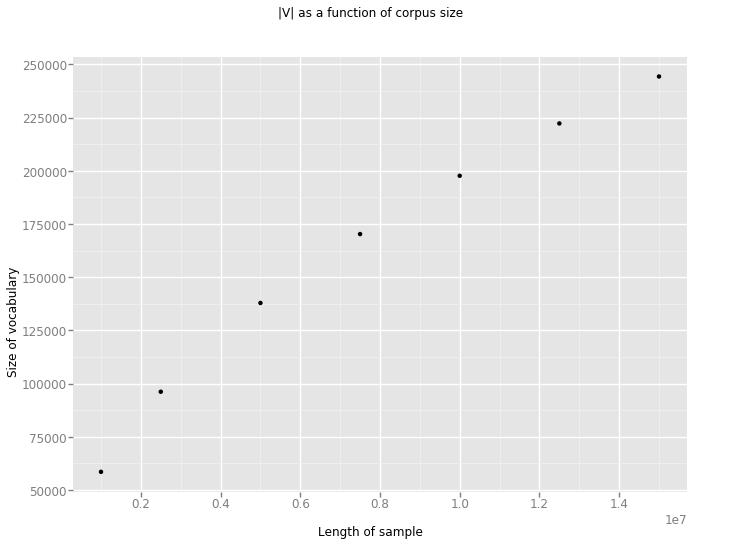

<ggplot: (-9223372036268986522)>

In [58]:
ggplot(vocab_corpus_size, aes(x = 'Length of sample', y = 'Size of vocabulary')) + \
    geom_point() + \
    ggtitle('|V| as a function of corpus size')

Let's change our plot to log scales...

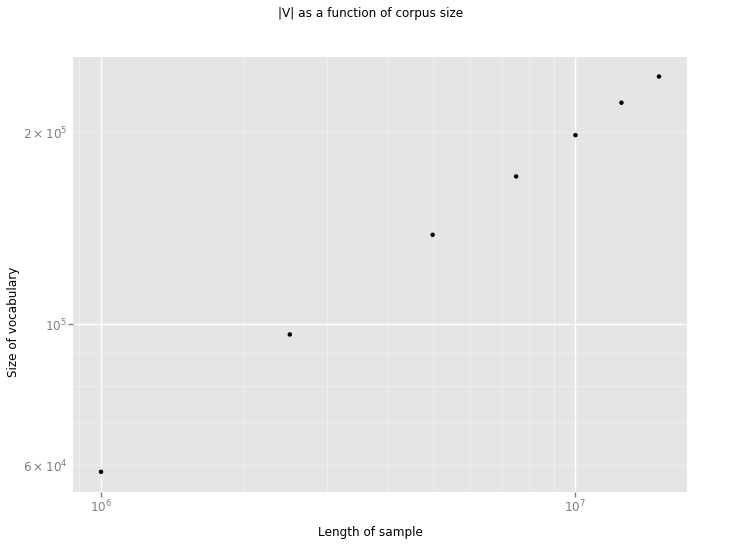

<ggplot: (-9223372036243285458)>

In [59]:
ggplot(vocab_corpus_size, aes(x = 'Length of sample', y = 'Size of vocabulary')) + \
    geom_point() + \
    ggtitle('|V| as a function of corpus size') + \
    scale_x_log() + scale_y_log()

## Exercises for the reader -- Implementing another evaluation measure 

Instead of (or in addition to) looking at how a very simple normalization procedure and/or the number of word tokens in a corpus affects data sparsity for downstream n-gram modeling, we could also see how normalizing our data (or increasing the size of the training set) affects *perplexity* of a test set.

To explore either question, you'll need to write code to *split data* into a training and test set and code to *calculate the perplexity of a model* trained on a particular training set on a particular test set.

# Python / tool resources

1. Jupyter notebook extensions that may make using Jupyter a bit easier or a better presentation tool -- http://jupyter-contrib-nbextensions.readthedocs.io/en/latest/
 a. Development -- When you have some cells that take a long time to execute -- ExecuteTime, Notify
 b. Presentation/documentation -- If you'd like to reference Python variables in Markdown -- Python Markdown
 c. Presentation/documentation -- If you'd like to organize and navigate a long notebook -- Table of Contents (2), Collapsible Headings
 d. Development -- If you'd like to avoid cluttering a notebook with throw-away, disposable REPL cells -- Scratchpad
2. Another Jupyter extension that may be useful for presentations is the Dashboards extension -- http://jupyter-dashboards-layout.readthedocs.io/en/latest/ 
3. Pandas / dataframes:
 a. http://synesthesiam.com/posts/an-introduction-to-pandas.html
 b. http://pandas.pydata.org/pandas-docs/stable/10min.html
 c. Referenced, but not used here -- relational-algebra-like operators for conveniently manipulating dataframes inspired by R's dplyr
  - The python package that implements much of this functionality for pandas in Python: https://github.com/kieferk/dfply
  - Some more information about what this functionality looks like in R (and what dfply/pandas is trying to imitate):
   - https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf
   - https://rpubs.com/justmarkham/dplyr-tutorial
   - https://cran.rstudio.com/web/packages/dplyr/vignettes/introduction.html
4. ggplot for Python - https://github.com/yhat/ggpy
 - Why consider using this instead of matplotlib? http://blog.yhat.com/posts/ggplot-for-python.html
 - What's the big idea? http://vita.had.co.nz/papers/layered-grammar.pdf

# Further reading on language modeling

For those interested in reading more about language modeling (and particularly smoothing), check out
 - Goodman, J. (2001). *A bit of progress in language modeling.* http://www-labs.iro.umontreal.ca/~felipe/IFT6010-Hiver2015/resources-2011/Articles/goodman2001.pdf